[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


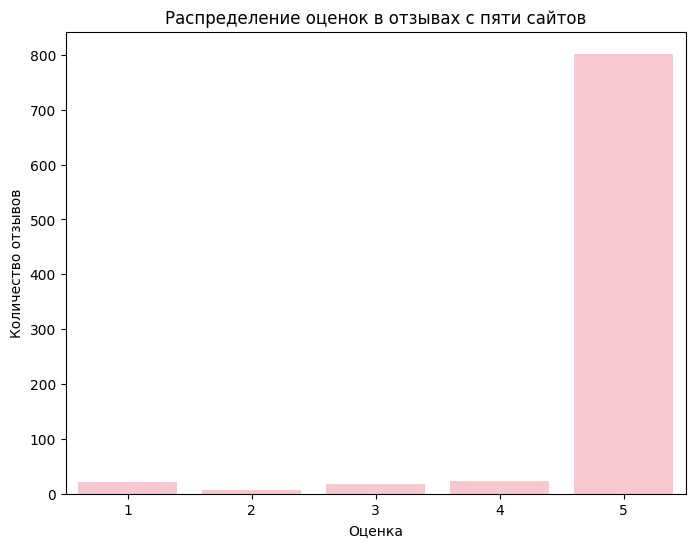

Ключевые слова в низких оценках:
[('время', 8), ('деньги', 7), ('Администратор', 5), ('пробное', 4), ('минут', 4), ('абонемента', 4), ('месяц', 4), ('сайте', 4), ('никто', 4), ('душ', 3), ('тренировке', 3), ('свидания', 3), ('претензию', 3), ('итоге', 3), ('сказали', 3), ('тренировки', 3), ('пришлось', 3), ('сложно', 3), ('занятий', 3), ('растяжке', 3)]
Ключевые слова в высоких оценках:
[('тренировки', 196), ('Очень', 188), ('тренеры', 156), ('тренера', 113), ('Reshape', 101), ('атмосфера', 94), ('тренировок', 93), ('залы', 86), ('нравится', 72), ('Хожу', 65), ('Спасибо', 54), ('студия!', 53), ('ходить', 51), ('Студия', 49), ('удобное', 48), ('занятий', 46), ('уютная', 46), ('тренеров', 45), ('хожу', 44), ('расположение', 43)]


<ipython-input-12-30624d5ed159>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Частота', y='Слово', data=low_df, palette='Reds')
<ipython-input-12-30624d5ed159>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Частота', y='Слово', data=high_df, palette='Greens')


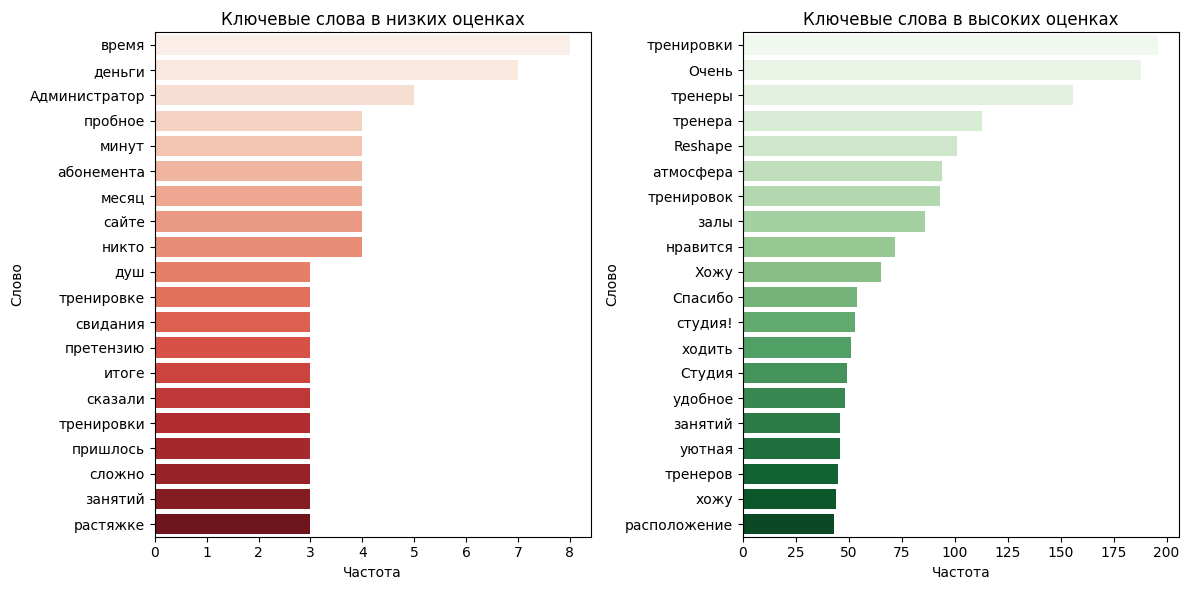

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
from collections import Counter

# ЭТУ БИБЛИОТЕКУ Я ВЗЯЛА ИЗ НОУТБУКА НА САЙТЕ https://www.kaggle.com/code/weirditya/amazon-review-sentiment-analysis-using-python-ml/notebook
nltk.download('stopwords')
stop_words = list(stopwords.words('russian'))

mix_stop_words = stop_words + [
    'это', 'очень', 'абонемент', 'место', 'студия', 'студии', 'занятие', 'зал',
    'заниматься', 'зале', 'мало', 'занятия', 'работает', 'пришла', 'народу',
    'спам', 'раньше', 'тренер', 'тренировку', 'упражнения', 'день', 'ваш', 'одно', 'вернусь', 'мини', 'могу', 'советую', 'сказала',
    'сретенке', 'желание','полное', 'студию', 'клиентов', 'ещё', 'абсолютно', '13', 'хорошие', 'хотя', 'хотела', 'людей', 'ходит',
    'Я','но', 'Не', 'если', 'Больше', 'В', 'Если', 'После', 'раз,', 'Но', 'Все', 'всем', 'просто', 'каждый', 'из-за', '-', 'На'
]

df1 = pd.read_excel('reshape1.xlsx')
df2 = pd.read_excel('reshape2.xlsx')
df3 = pd.read_excel('reshape3.xlsx')
df4 = pd.read_excel('reshape4.xlsx')
df5 = pd.read_excel('reshape5.xlsx')
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

rating_distribution = df['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, color = 'pink')
plt.title('Распределение оценок в отзывах с пяти сайтов')
plt.xlabel('Оценка')
plt.ylabel('Количество отзывов')
plt.show()


low_ratings = df[df['rating'] <= 2]
high_ratings = df[df['rating'] >= 4]


def analyze_keywords(reviews, max_features=20):
    all_text = ' '.join(reviews)
    all_text = all_text.replace('.', '').replace(',', '')
    all_text = ''.join([char for char in all_text if not char.isdigit()])
    words = all_text.split()
    words = [word for word in words if word not in mix_stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(max_features)


low_rating_keywords = analyze_keywords(low_ratings['review'])
print("Ключевые слова в низких оценках:")
print(low_rating_keywords)

high_rating_keywords = analyze_keywords(high_ratings['review'])
print("Ключевые слова в высоких оценках:")
print(high_rating_keywords)

low_df = pd.DataFrame(low_rating_keywords, columns=['Слово', 'Частота'])
high_df = pd.DataFrame(high_rating_keywords, columns=['Слово', 'Частота'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Частота', y='Слово', data=low_df, palette='Reds')
plt.title('Ключевые слова в низких оценках')
plt.subplot(1, 2, 2)
sns.barplot(x='Частота', y='Слово', data=high_df, palette='Greens')
plt.title('Ключевые слова в высоких оценках')
plt.tight_layout()
plt.show()